In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('03_04_datos.csv', delimiter=";")

In [3]:
print(df.head())

   Variable1  Variable2
0  -4.030499  -6.955657
1  -6.687653   7.467359
2  -3.334960   5.775981
3  -5.812554  -7.506389
4  -6.648924   7.142999


- DBSCAN (Agrupamiento Especial de Aplicaciones con Ruido Basado en la Densidad):
    - Algoritmo de agrupamiento no supervisado basado en la densidad
    - Los clústeres se forman a partir de regiones densas y están separados por regiones de densidad baja o nula
    - Calcula los gráficos de vecinos más cercanos y crea grupos de forma arbitraria en conjuntos de datos que pueden contener ruido o valores atípicos

- Desafío: Mostrar los grupos que se forman a partir de los datos que se nos han dado. 
    1. Crear modelo y ajustarlo usando DBSCAN
    2. Imprimir las etiquetas
    3. Graficar los grupos

In [4]:
! pip install kneed

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df.values)

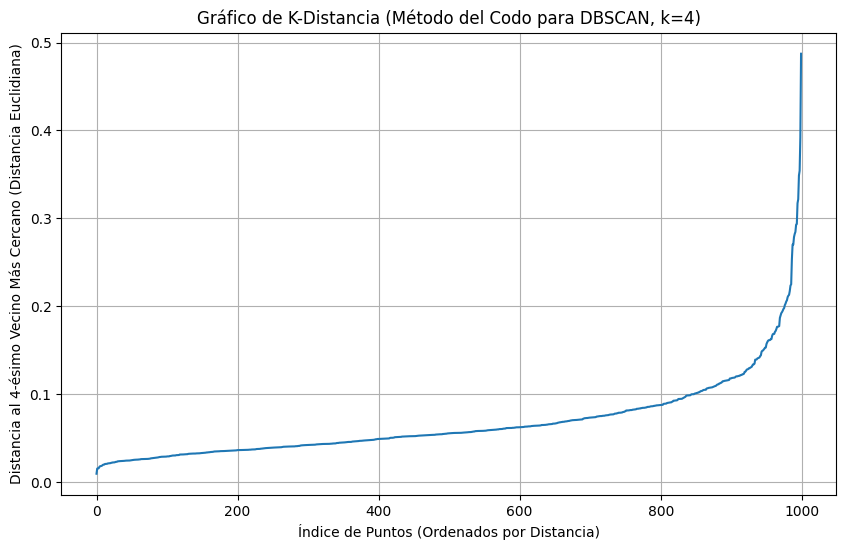

In [6]:
# Para estimar el valor óptimo del parámetro eps (epsilon) al aplicar DBSCAN, la técnica más común y recomendada es 
# utilizar un gráfico de la distancia del vecino más cercano k (k-nearest neighbors distance plot) o gráfico de codo 
# (elbow plot).

# El objetivo es encontrar una distancia crítica a la que la mayoría de los puntos comienzan a estar significativamente 
# más lejos de sus vecinos.

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Primero, debes decidir el valor del otro parámetro clave de DBSCAN: min_samples (el número mínimo de puntos requeridos para formar un núcleo denso).
# Una regla general común es establecer min_samples como el doble de la dimensionalidad de tu conjunto de datos (min_samples >= 2 * D).
# Valores típicos suelen estar entre 4 y 10 para conjuntos de datos 2D o 3D. Un valor de k=4 es un punto de partida seguro para muchos casos.
k = 4

# Calcula la distancia desde cada punto de datos hasta su k-ésimo vecino más cercano (usando la k que definiste en el paso anterior)
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)

distances, indices = neigh.kneighbors(X)

# Ordena las distancias del k-ésimo vecino más cercano
# (Generalmente se usa la última columna si n_neighbors=k+1 o simplemente distances[:, -1])
k_distance = np.sort(distances[:, k-1], axis=0)

# Grafica las distancias ordenadas en un gráfico de líneas. 
# El eje X representa los puntos ordenados y el eje Y representa la distancia a su k-ésimo vecino más cercano. 

# Grafica las distancias ordenadas en un gráfico de líneas. 
# El eje X representa los puntos ordenados y el eje Y representa la distancia a su k-ésimo vecino más cercano. 
plt.figure(figsize=(10, 6))
plt.plot(k_distance)
plt.title(f'Gráfico de K-Distancia (Método del Codo para DBSCAN, k={k})')
plt.xlabel('Índice de Puntos (Ordenados por Distancia)')
plt.ylabel(f'Distancia al {k}-ésimo Vecino Más Cercano (Distancia Euclidiana)')
plt.grid(True)
plt.show()

# El gráfico resultante tendrá una forma característica que se asemeja a un codo humano o un "sierra" aplanada 
# que de repente sube bruscamente.
# Busca el punto en el gráfico donde la curva cambia drásticamente de ser relativamente plana a subir bruscamente.
# La distancia correspondiente a este punto de inflexión ("codo") es el valor recomendado para eps.

Valor de eps calculado automáticamente: 0.2703325079721506


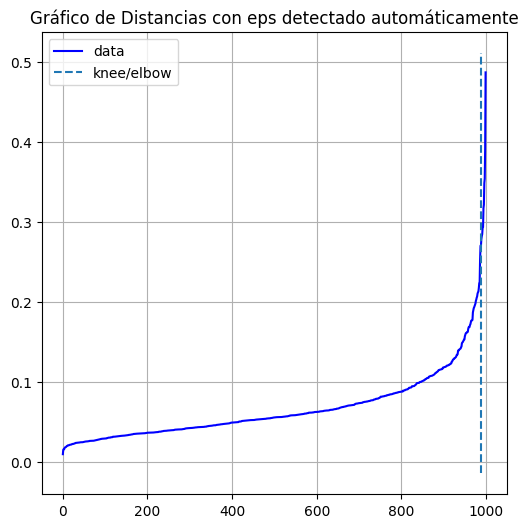

In [7]:
from kneed import KneeLocator

# Detectar el codo automáticamente
# 'curve': 'convex' para el gráfico de distancias
# 'direction': 'increasing' porque el gráfico sube
kneedle = KneeLocator(
    x=range(len(k_distance)),
    y=k_distance,
    curve='convex',
    direction='increasing'
)

# El valor óptimo de eps se encuentra en el atributo 'knee_y' del objeto kneedle
eps = kneedle.knee_y
print(f"Valor de eps calculado automáticamente: {eps}")

kneedle.plot_knee()
plt.title("Gráfico de Distancias con eps detectado automáticamente")
plt.grid(True)
plt.show()

In [8]:
# eps (epsilon): El radio de vecindad. Puntos dentro de esta distancia son considerados vecinos. Lo tomamos a partir del codo de la gráfica anterior.
# min_samples: El número mínimo de puntos requeridos para formar una región densa (cluster). 
db = DBSCAN(eps=eps, min_samples=k).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

print(labels)

[ 0  1  1  0  1  2  1  1  0  1  1  2  0  1  2  2  2  1  1  0  2  0  0  0
  1  1  1  0  2  1  1  2  0  2  1  2  1  1  2  1  2  0  1  2  1  1 -1  1
  1  1  0  0  1  0  1  2  1  0  0  2  1  1  1  2  0  2  1  2  1  2  1  0
  1  1  1  2  1  0  0  1  1  1  1  2  2  1  2  1  1  2  0  2  1  1  1  1
  2  2  1  0  1  1  0  2  2  2  2  0  1  0  2  1  0  1  2  1  0  2  1  0
  2  1  0  2  1  2  1  1  0  2  2  1  1  1  1  1  2  2  1  1  1  1  1  0
  0  1  2  1  2  2  1  0  1  2  0  1  1  2  0  1  0  2  1  1  2  1  1  0
  1  0  1  2  2  1  0  1  0  2  1  1  0  2  1  2  2  1  1  0  0  0  1  1
  0  2  1  2  2  0  1  2  0  0  1  0  0  2  1  0  1  1  2  1  1  0  1  1
  1  2  0  0  1  1  0  1  1  0  0  1  0  0  2  0  1  0  2  1  1  2  1  2
  2  2  2  1  2  2  0  1  0  0  2  2  2  1  2  1  1  0  2  1  1  1  0  0
  2  2  0  2  0  0  2  2  1  1  0  0  0  1  1  1  2  2  1  1  1  2  1  2
  0  1  1  2  1  0  2  1  0  1  2  0  1  1  0  1  1  1  1  0  0  0  1  0
  0  0  1  0  1  1  1  1  0  0  0  2  1  0  1  0  1

In [9]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Clusters estimados: {n_clusters_}')
print(f'Puntos de ruido estimados: {n_noise_}')

Clusters estimados: 3
Puntos de ruido estimados: 6


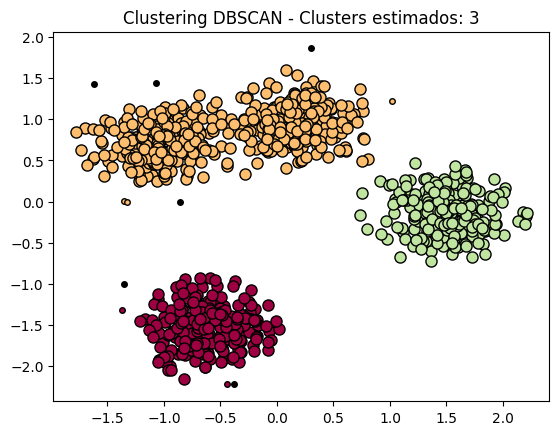

In [10]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Puntos de ruido pintados de negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Puntos que son muestras núcleo (core samples)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    # Puntos que no son muestras núcleo (pero son parte de un cluster)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title(f'Clustering DBSCAN - Clusters estimados: {n_clusters_}')
plt.show()